In [ ]:
# importing the basic libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
# data loading and printing 5 first records

data= pd.read_csv('/content/diabetes.csv')

data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.shape

(768, 9)

In [ ]:
# checking the is there any NUll values/NAN values in given dataset 
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Checking the given the dataset is balanced or not

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


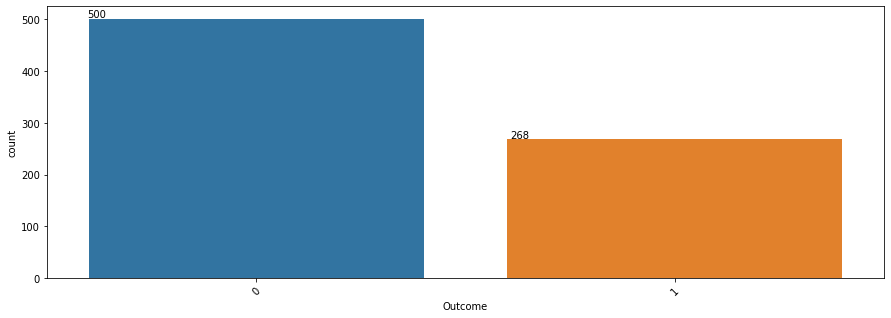

In [ ]:
plt.figure(figsize = (15,5))
ax= sb.countplot(data['Outcome'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 45)
plt.show()

Outcome: Class Variable (0 or 1) where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes.

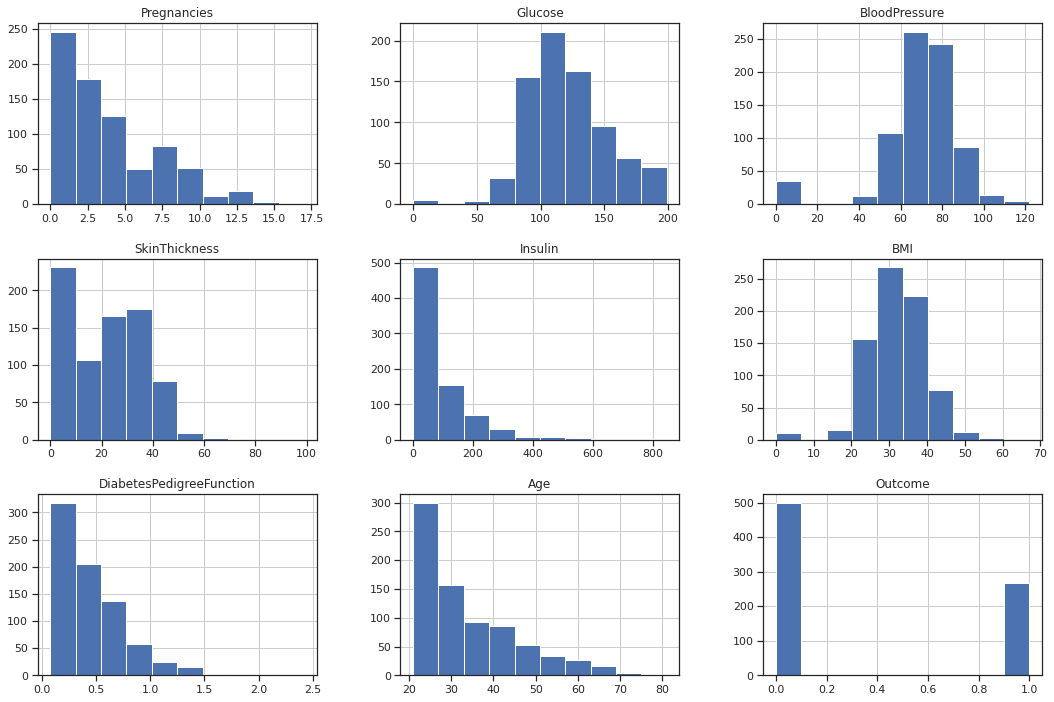

In [ ]:
data.hist(figsize=(18,12))
plt.show()

In [ ]:
# finding the correlation of the data wrt to Outcome feature

data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


ploting the correlation using heatmap 

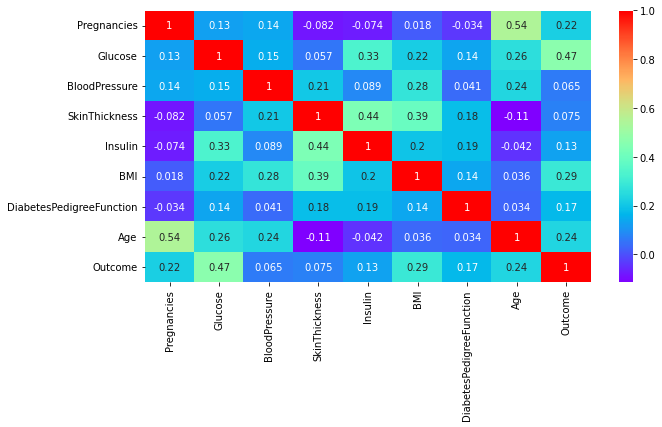

In [ ]:
# ploting the correlation using heatmap 

plt.figure(figsize = (10,5))
sb.heatmap(data.corr(), annot = True, cmap="rainbow")
plt.show()

<Figure size 1440x1440 with 0 Axes>

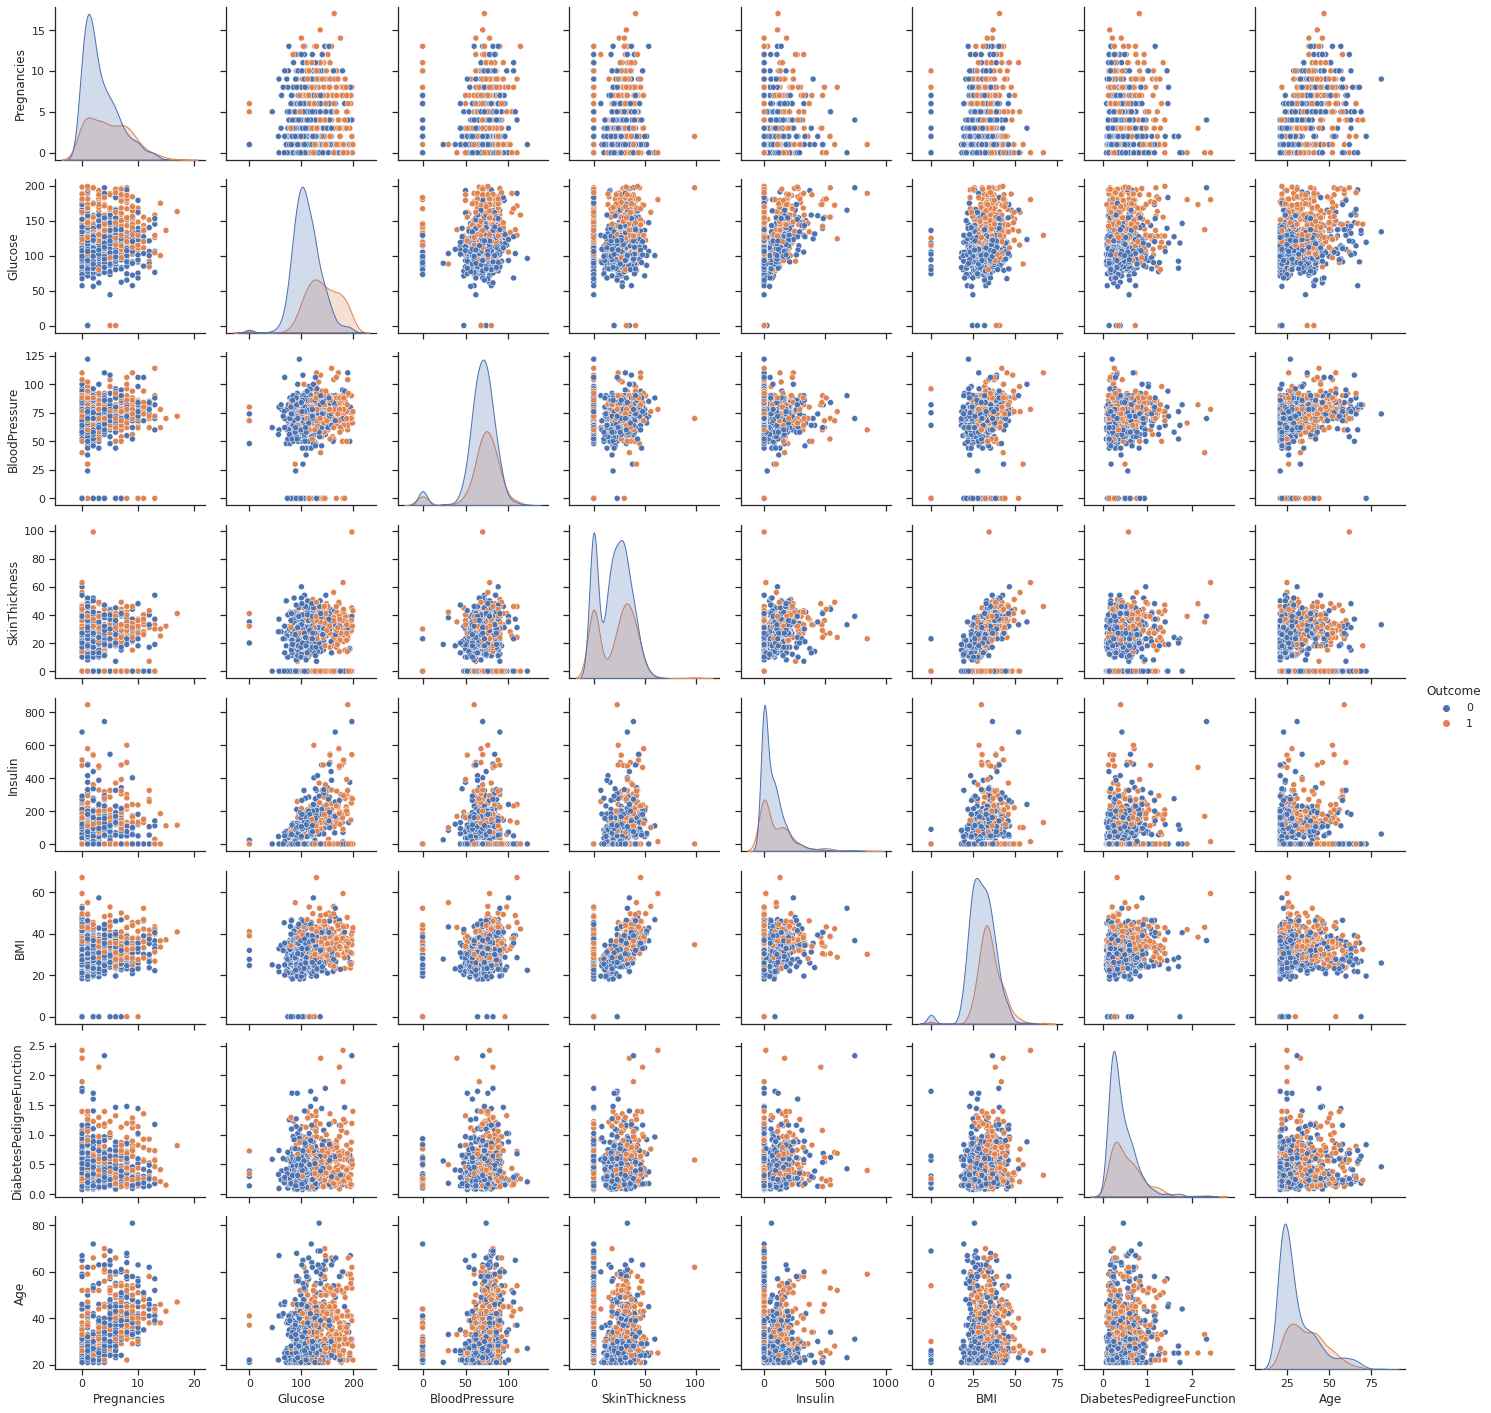

In [ ]:
sb.set(style='ticks')
plt.figure(figsize=(20,20))
sb.pairplot(data, hue='Outcome')

In [ ]:
# dividing the dataset into dependent and independent

In [ ]:

X= data.drop('Outcome',axis=1)

X.head(2)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [ ]:

y=data['Outcome']
y.head(2)

0    1
1    0
Name: Outcome, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

print('X training data set size', X_train.shape)

print('y training data set size', y_train.shape)


print('X testing data set size', X_test.shape)

print('y testing data set size', y_test.shape)

X training data set size (576, 8)
y training data set size (576,)
X testing data set size (192, 8)
y testing data set size (192,)


Applying Decision Tree Machine Learning Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [ ]:
#prediction and Accuracy
y_pred = classifier.predict(X_test)
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.7135416666666666


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[100,  30],
       [ 25,  37]])

Got the **accuracy of 71%** with all features 

Applying Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)#Accuracy
from sklearn import metrics
print('After applying Scaling Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

After applying Scaling Accuracy Score: 0.7239583333333334


In [ ]:
from sklearn.metrics import confusion_matrix
cmsc = confusion_matrix(y_test, y_pred)

cmsc

array([[104,  26],
       [ 27,  35]])

Got the **accuracy of 72%** with all features and applying Standard scaling

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005394,0.000335,0.003006,0.000225,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.694444,0.756944,0.729167,0.729167,0.727431,0.022165,24
1,0.004741,0.000376,0.003716,0.001638,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.701389,0.756944,0.729167,0.729167,0.729167,0.019642,15
2,0.006356,0.001669,0.003847,0.001064,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.701389,0.756944,0.729167,0.729167,0.729167,0.019642,15
3,0.006163,0.001457,0.002996,0.000138,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.701389,0.756944,0.736111,0.715278,0.727431,0.021049,22
4,0.005533,0.001422,0.003981,0.001416,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.701389,0.722222,0.736111,0.701389,0.715278,0.014731,36


In [ ]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
13,0.006501,0.002330,0.002942,0.000070,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.736111,0.756944,0.784722,0.715278,0.748264,0.025692,1
18,0.004773,0.000251,0.005850,0.005265,gini,10,50,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.736111,0.756944,0.784722,0.715278,0.748264,0.025692,1
23,0.005052,0.000097,0.002770,0.000186,gini,20,50,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.736111,0.756944,0.784722,0.715278,0.748264,0.025692,1
30,0.006396,0.001818,0.002688,0.000066,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.694444,0.770833,0.770833,0.729167,0.741319,0.031965,4
31,0.005528,0.000112,0.003414,0.000955,entropy,3,10,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.694444,0.770833,0.770833,0.729167,0.741319,0.031965,4


In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=42)

In [ ]:
dt_best = grid_search.best_estimator_

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [ ]:
evaluate_model(dt_best)

Train Accuracy : 0.7743055555555556
Train Confusion Matrix:
[[299  71]
 [ 59 147]]
--------------------------------------------------
Test Accuracy : 0.78125
Test Confusion Matrix:
[[113  17]
 [ 25  37]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       130
           1       0.69      0.60      0.64        62

    accuracy                           0.78       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.78      0.78      0.78       192



In [ ]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['Non Diabetic', "Diabetic"],
                       filled=True)

With these parameters max_depth=5, min_samples_leaf=50, random_state=4 got the **higest accuracy as 78%**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=5)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

5 selected features


In [ ]:
chi_feature

['Pregnancies', 'Glucose', 'Insulin', 'DiabetesPedigreeFunction', 'Age']

In [ ]:
x=data.iloc[:,:-1]  #Independent variable
y=data.iloc[:,-1]   #Target variable
f_score=chi2(x,y)   #returns f score and p value 
f_score

(array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
        2175.56527292,  127.66934333,    5.39268155,  181.30368904]),
 array([4.55261043e-026, 5.48728628e-309, 2.71819252e-005, 3.15697650e-013,
        0.00000000e+000, 1.32590849e-029, 2.02213728e-002, 2.51638830e-041]))

In [ ]:
# printing p values for each categorical features
p_value=pd.Series(f_score[1],index=x.columns)
p_value.sort_values(ascending=False,inplace=True)

In [ ]:
p_value

DiabetesPedigreeFunction     2.022137e-02
BloodPressure                2.718193e-05
SkinThickness                3.156977e-13
Pregnancies                  4.552610e-26
BMI                          1.325908e-29
Age                          2.516388e-41
Glucose                     5.487286e-309
Insulin                      0.000000e+00
dtype: float64

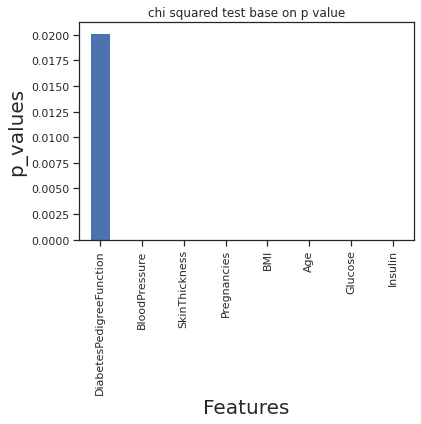

In [ ]:
p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test base on p value")
plt.show()

In [ ]:
#Feature selection using chi2

Applying the model with top 5 features and parameter tunning:

In [ ]:
#selected features are ['Pregnancies', 'Glucose', 'Insulin', 'DiabetesPedigreeFunction', 'Age']

In [ ]:
x= data[['Pregnancies', 'Glucose', 'Insulin', 'DiabetesPedigreeFunction', 'Age']]

x.head(2)

,Pregnancies,Glucose,Insulin,DiabetesPedigreeFunction,Age
0,6,148,0,0.627,50
1,1,85,0,0.351,31


In [ ]:
y=data['Outcome']

y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(x,y,test_size = 0.3, random_state= 42)

In [ ]:
print('X training data set size', X_train.shape)

print('y training data set size', y_train.shape)


print('X testing data set size', X_test.shape)

print('y testing data set size', y_test.shape)

X training data set size (537, 5)
y training data set size (537,)
X testing data set size (231, 5)
y testing data set size (231,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
myDT=DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=42)

In [ ]:
classifier = myDT.fit(X_train,y_train)

y_pred = classifier.predict(X_test)#Accuracy
from sklearn import metrics
print('After applying Scaling Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

After applying Scaling Accuracy Score: 0.7532467532467533


In [ ]:
print(confusion_matrix(y_test, classifier.predict(X_test)))

[[127  24]
 [ 33  47]]


In [ ]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       151
           1       0.66      0.59      0.62        80

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



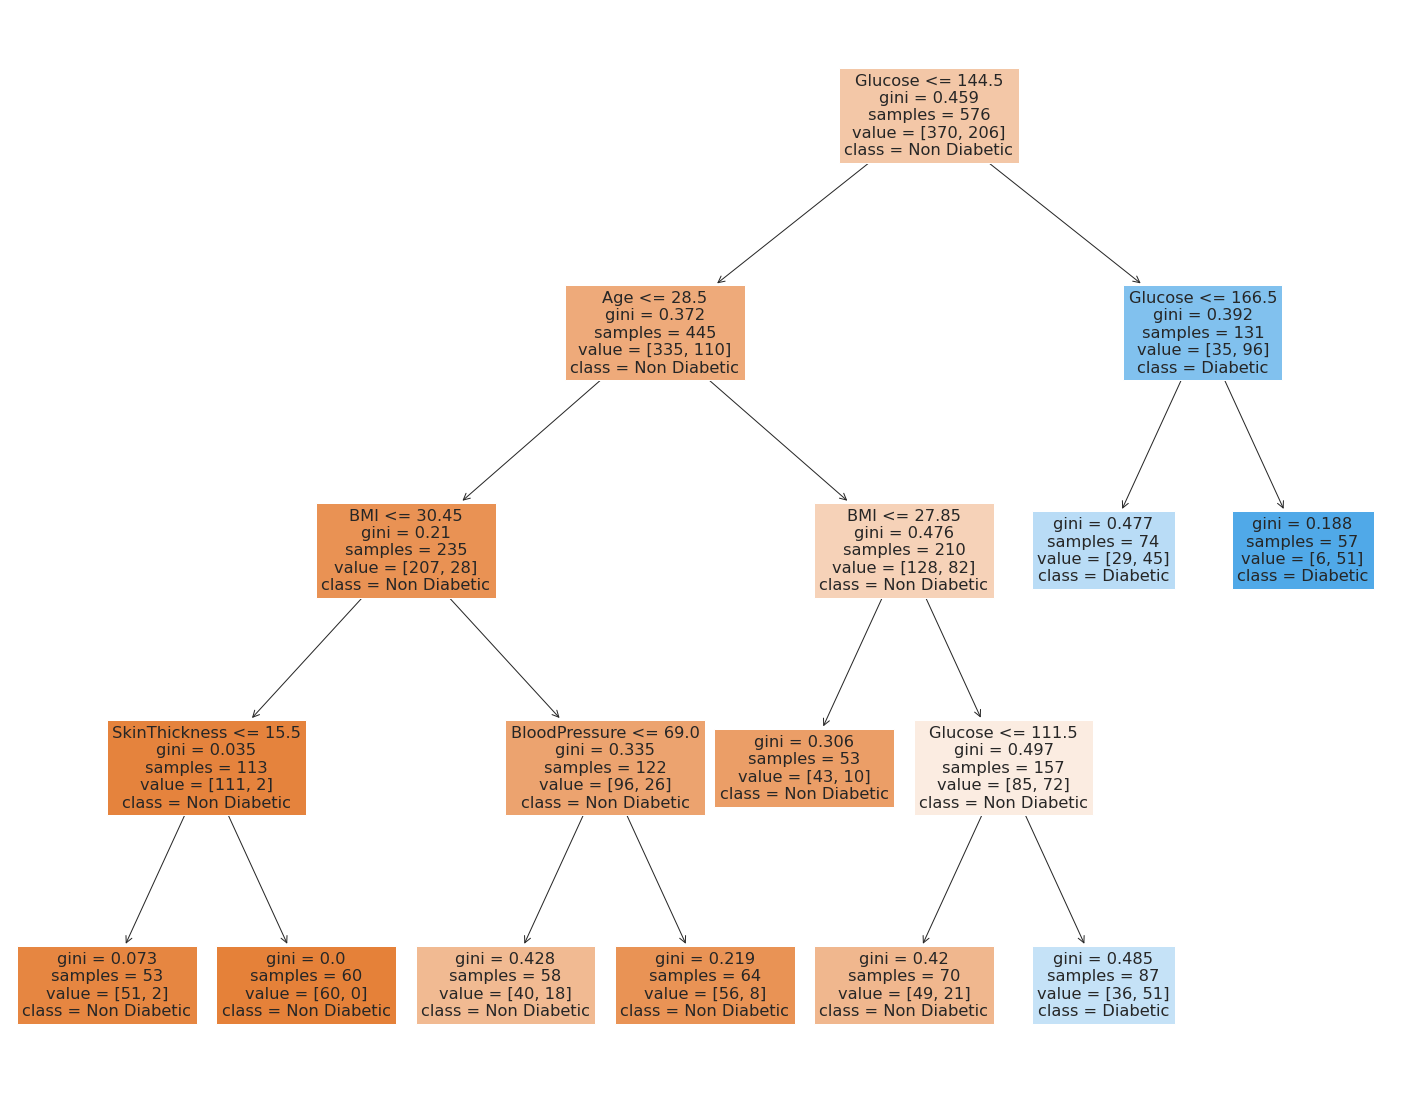

In [ ]:
get_dt_graph(dt_best)